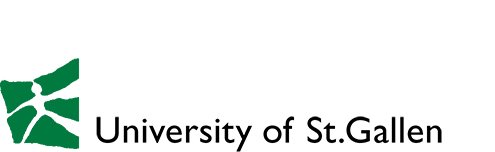

In [1]:
from IPython.display import Image 
Image(filename='intro.jpg')

-_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_-

# Class : 7,325,1.00 Smart Data Analytics
# Authors : A. Morales, M. Virgolin, V. Porret

-_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_-

# <u> Part : Natural Language Processing</u>


The goal of this part is to analyze the keywords in the mails and try to classify them by topics.
The table of this part is : </p>
1. Import data and library</p>
2. Create a Dataframe</p>
3. Prepare text (mails) and libraries for NLP (5 steps)</p>
4. Model the data with the NLP (Genesim) tool</p>
5. Analyze the results</p>
6. 4Fun : WordCloud of the keywords</p>

-_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_-

### 1- Import Data and Library

-_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_-

In [2]:
%reset -f

%matplotlib inline
import pandas as pd
import random
import numpy as np
import Source as source
import data
import matplotlib.pyplot as plt

#Select randomly only a few mails as the data.set is huge
data_sample = data.data.sample(frac=0.025)

Shape of the data : 

In [34]:
print(data_sample.shape)

(12935, 2)


Quick look at the data :

In [4]:
print(data_sample.head(3))

                                    file  \
510278             williams-w3/inbox/68.   
20133   baughman-d/power/interviews/140.   
35113              blair-l/meetings/688.   

                                                  message  
510278  Message-ID: <14525019.1075839941268.JavaMail.e...  
20133   Message-ID: <16551945.1075855148203.JavaMail.e...  
35113   Message-ID: <16219802.1075853040526.JavaMail.e...  


Info :

In [5]:
print(data_sample.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12935 entries, 510278 to 320649
Data columns (total 2 columns):
file       12935 non-null object
message    12935 non-null object
dtypes: object(2)
memory usage: 303.2+ KB
None


The dataset has two columns. The first one give the origin of the mail and the second one shows the message. As the mails are not cleaned, we first have to do it. 

-_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_-

## 2. Create a Dataframe

-_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_-

Some functions from the Source.py file are used for this step

In [6]:
df_body_to_from = pd.DataFrame(source.parse_into_emails(data_sample.message))
print(df_body_to_from.head())

                                                body  \
0  MARKET NOTICEJanuary 30, 2002ISO Market Partic...   
1  Attached is two resumes for your consideration...   
2       Lindy/Donna - Review Org. Linepack Mgmt 4102   
3                                                      
4  I went through our Lotus Notes Master Swap Agr...   

                                                  to  \
0  scsettlecontacts@caiso.com, 20participants@cai...   
1                         Dave Marquardt/HOU/EES@EES   
2                                                      
3                            bill.williams@enron.com   
4                              frank.davis@enron.com   

                        from_  
0  crcommunications@caiso.com  
1             Marquardt, Dave  
2      outlook.team@enron.com  
3  arsystem@mailman.enron.com  
4        tana.jones@enron.com  


The "body" are the mails analayzed in this Notebook. 

-_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_-

## 3. Prepare texts (mails) and libraries for NLP

-_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_-

We are going to follow those steps (as suggested steps given by https://medium.com/datadriveninvestor/nlp-with-lda-analyzing-topics-in-the-enron-email-dataset-20326b7ae36f). 
It is essential to pass through each one to minimze the noise of our analysis. 
0. Import more libraries 
1. Collect the body of emails into a list 
2. Tokenize the text into separate words<
3. Remove stop words to minimize the noise
4. Group bigrams
5. Consolidate similar terms using lemmatization

### 3.0 Import more libraries

In [7]:
import gensim
#Gensim is an open-source library for unsupervised topic modeling.
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy #To prepare text
import pyLDAvis #Interactive topic model visualization
import pyLDAvis.gensim
import nltk #Natural Language Toolkit
import re #Ex : "A" and "a"
from nltk.corpus import stopwords #To delete stop words

### 3.1 Collect the body of emails into a list

Example of one mail. Among this document, the same mail will be display as example. The number of this mail can be changed here. 

In [8]:
mail_number = 42 #mail used in the examples below
df_body_to_from["body"][mail_number]

'dfarmer@enron.com, dcrider@duke-energy.com, dfbane@duke-energy.com,dcspencer@duke-energy.com, djdobb@duke-energy.com,jabretz@duke-energy.com, jclehman@duke-energy.com,jaurbanek@duke-energy.com, lcspivey@duke-energy.com,mrcherry@duke-energy.com, rpreed@duke-energy.com,rcdouglas@duke-energy.com, sbeemer@duke-energy.com,wespeckels@duke-energy.comPlease decrease deliveries to Eastrans to 0 MMBtu/dy effective 3/29/01 andmaintain at 0 until further notified.The redeliveries will be 0 as well.Fuels Cotton Valley gas will be valued per Paragraph 3 of the ContractPrice (per MMBtu) section in the Transaction Agreement.'

In [9]:
all_emails = df_body_to_from.body.values.tolist()
print("Example mail: ")
#all_emails #not printed as it is quite huge
print("Same as before but name assigned more efficient")
all_emails[mail_number] 

Example mail: 
Same as before but name assigned more efficient


'dfarmer@enron.com, dcrider@duke-energy.com, dfbane@duke-energy.com,dcspencer@duke-energy.com, djdobb@duke-energy.com,jabretz@duke-energy.com, jclehman@duke-energy.com,jaurbanek@duke-energy.com, lcspivey@duke-energy.com,mrcherry@duke-energy.com, rpreed@duke-energy.com,rcdouglas@duke-energy.com, sbeemer@duke-energy.com,wespeckels@duke-energy.comPlease decrease deliveries to Eastrans to 0 MMBtu/dy effective 3/29/01 andmaintain at 0 until further notified.The redeliveries will be 0 as well.Fuels Cotton Valley gas will be valued per Paragraph 3 of the ContractPrice (per MMBtu) section in the Transaction Agreement.'

### 3.2 Tokenize the text into separate words

The tokenize part is used to separate each words and remove the ponctuation. 

In [10]:
# Tokenize // List of words
def to_words(mail):
    for sentence in mail:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc= punctuations
words_emails = list(to_words(all_emails))
print(words_emails[mail_number])

['dfarmer', 'enron', 'com', 'dcrider', 'duke', 'energy', 'com', 'dfbane', 'duke', 'energy', 'com', 'dcspencer', 'duke', 'energy', 'com', 'djdobb', 'duke', 'energy', 'com', 'jabretz', 'duke', 'energy', 'com', 'jclehman', 'duke', 'energy', 'com', 'jaurbanek', 'duke', 'energy', 'com', 'lcspivey', 'duke', 'energy', 'com', 'mrcherry', 'duke', 'energy', 'com', 'rpreed', 'duke', 'energy', 'com', 'rcdouglas', 'duke', 'energy', 'com', 'sbeemer', 'duke', 'energy', 'com', 'wespeckels', 'duke', 'energy', 'complease', 'decrease', 'deliveries', 'to', 'eastrans', 'to', 'mmbtu', 'dy', 'effective', 'andmaintain', 'at', 'until', 'further', 'notified', 'the', 'redeliveries', 'will', 'be', 'as', 'well', 'fuels', 'cotton', 'valley', 'gas', 'will', 'be', 'valued', 'per', 'paragraph', 'of', 'the', 'contractprice', 'per', 'mmbtu', 'section', 'in', 'the', 'transaction', 'agreement']


### 3.3 Remove stop words to minimize the noise

Words as "the", "as" or "you" are deleted. 

In [12]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','com'])

def remove_Allstopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
words_email_nostop = remove_Allstopwords(words_emails)
print("Example mail : ")
np.transpose(words_email_nostop[mail_number])


Example mail : 


array(['dfarmer', 'enron', 'dcrider', 'duke', 'energy', 'dfbane', 'duke',
       'energy', 'dcspencer', 'duke', 'energy', 'djdobb', 'duke',
       'energy', 'jabretz', 'duke', 'energy', 'jclehman', 'duke',
       'energy', 'jaurbanek', 'duke', 'energy', 'lcspivey', 'duke',
       'energy', 'mrcherry', 'duke', 'energy', 'rpreed', 'duke', 'energy',
       'rcdouglas', 'duke', 'energy', 'sbeemer', 'duke', 'energy',
       'wespeckels', 'duke', 'energy', 'complease', 'decrease',
       'deliveries', 'eastrans', 'mmbtu', 'dy', 'effective',
       'andmaintain', 'notified', 'redeliveries', 'well', 'fuels',
       'cotton', 'valley', 'gas', 'valued', 'per', 'paragraph',
       'contractprice', 'per', 'mmbtu', 'section', 'transaction',
       'agreement'], dtype='<U13')

### 3.4 Group bigrams


Example : Traffic and light = Traffic light

In [13]:
#Preparation: 
bigram = gensim.models.phrases.Phrases(words_email_nostop, min_count=5, threshold=100)

#Utilisation : 
bigram_mod = gensim.models.phrases.Phraser(bigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_bigrams = make_bigrams(words_email_nostop)

"Threshold" represents a "score threshold for forming the phrases (higher means fewer phrases). A phrase of words a followed by b is accepted if the score of the phrase is greater than threshold. see the scoring setting."</p>
"Min_count ignore all words and bigrams with total collected count lower than this."

In [14]:
#Example : 
print("Example mail : ")
print(data_words_bigrams[mail_number])

Example mail : 
['dfarmer', 'enron', 'dcrider', 'duke_energy', 'dfbane_duke', 'energy', 'dcspencer_duke', 'energy', 'djdobb', 'duke_energy', 'jabretz_duke', 'energy', 'jclehman', 'duke_energy', 'jaurbanek_duke', 'energy', 'lcspivey', 'duke_energy', 'mrcherry_duke', 'energy', 'rpreed', 'duke_energy', 'rcdouglas', 'duke_energy', 'sbeemer', 'duke_energy', 'wespeckels_duke', 'energy', 'complease', 'decrease', 'deliveries', 'eastrans', 'mmbtu', 'dy', 'effective', 'andmaintain', 'notified', 'redeliveries', 'well', 'fuels', 'cotton_valley', 'gas', 'valued', 'per', 'paragraph', 'contractprice', 'per', 'mmbtu', 'section', 'transaction', 'agreement']


This is a random mail but along our research, we saw for example than "north" and "america" were grouped together as weel as "Philipp" and "Allen". However, this tool does not correct the typo that we can see in some of the mails (as "dealsactually" or "withcompetition"). 

### 3.5 Consolidate similar terms using lemmatization

Example : Driving - Drives - Drove

In [15]:
nlp = spacy.load('en_core_web_sm', disable=[ 'ner','parser',])
def lemmatization(texts,allowed_postags=['NOUN','ADJ', 'VERB', 'ADV']):
    """"https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])        
    return texts_out

# Do lemmatization keeping only noun, adj, vb, adv
mail_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [16]:
np.transpose(mail_lemmatized[mail_number])

array(['energy', 'energy', 'djdobb', 'energy', 'energy', 'complease',
       'decrease', 'effective', 'notify', 'redeliverie', 'well', 'fuel',
       'gas', 'value', 'paragraph', 'contractprice', 'transaction',
       'agreement'], dtype='<U13')

Words have been transformed in the way we wanted. </p>Ex : Bidding = bid, selling = sell, and so on

-_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_-

## 4. Model the data with the NLP (Genesim) tool

-_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_-

Based on our research, we choose to use Latent Dirichlet Allocation (LDA )to expore the content of our data. An advantage of this method is that, unlike K-Mean, a word can belong to multiple categories. It is therefore more flexible and more adequat. One of the best library is Genesim (that we already imported at the step 3.0)

The steps for this part is : 
1. Create a dictionary
2. Create a corpus
3. Generate the model

### 4.1 Create a dictionary

Allow to get a register of the words in mails

In [17]:
id2word = corpora.Dictionary(mail_lemmatized)
print("Dictionary : ",id2word)

Dictionary :  Dictionary(70705 unique tokens: ['accept', 'account', 'adjust', 'assess', 'charge']...)


### 4.2 Create a corpus

Allow to get the register of the words with the number of times that those words have been seen. 

In [18]:
texts = mail_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print("Mail example : ")
np.transpose(corpus[mail_number])

Mail example : 


array([[  8, 120, 133, 151, 296, 442, 572, 712, 819, 989, 990, 991, 992,
        993, 994],
       [  4,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1]])

### 4.3 Generate the model

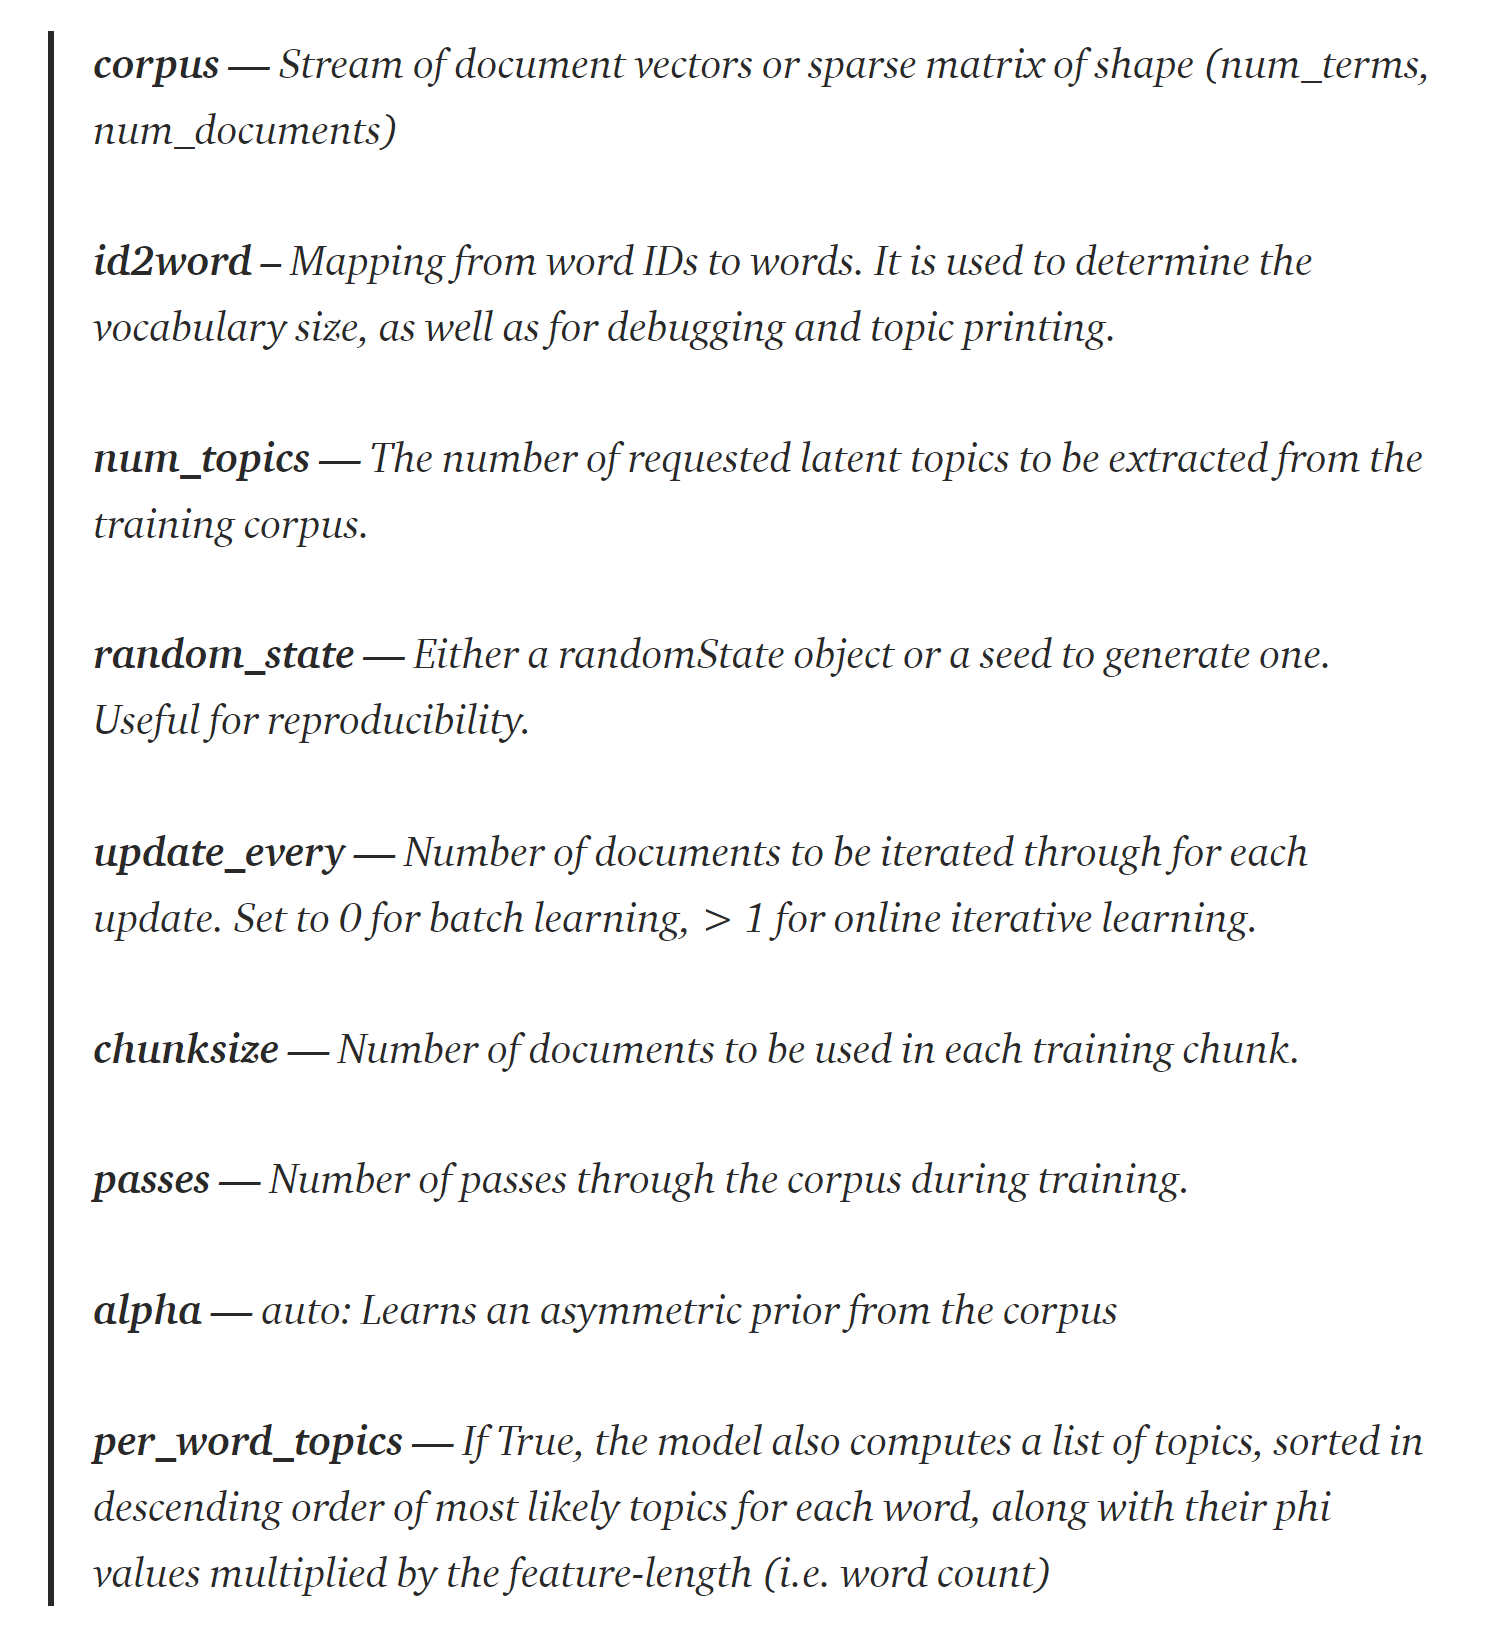

In [19]:
from IPython.display import Image
Image(filename='theory.png',width=400)

source : https://medium.com/datadriveninvestor/nlp-with-lda-analyzing-topics-in-the-enron-email-dataset-20326b7ae36f

In [20]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [21]:
print(lda_model.print_topics())

[(0, '0.063*"partner" + 0.022*"deadline" + 0.017*"reliant" + 0.016*"map" + 0.015*"student" + 0.011*"broad" + 0.008*"cooperation" + 0.007*"calculation" + 0.004*"dawn" + 0.004*"anymore"'), (1, '0.011*"new" + 0.010*"may" + 0.009*"meeting" + 0.008*"group" + 0.008*"time" + 0.008*"also" + 0.008*"business" + 0.008*"work" + 0.007*"system" + 0.007*"need"'), (2, '0.037*"say" + 0.027*"company" + 0.022*"power" + 0.021*"market" + 0.020*"energy" + 0.016*"price" + 0.015*"state" + 0.011*"year" + 0.009*"utility" + 0.008*"stock"'), (3, '0.044*"thank" + 0.027*"mail" + 0.023*"send" + 0.020*"call" + 0.019*"would" + 0.018*"forward" + 0.018*"attach" + 0.017*"need" + 0.016*"message" + 0.015*"deal"'), (4, '0.017*"edison" + 0.016*"authorize" + 0.014*"enrononline" + 0.014*"curve" + 0.011*"profile" + 0.011*"premium" + 0.011*"restrict" + 0.009*"price_quote" + 0.008*"leg" + 0.008*"sender"'), (5, '0.039*"font_size" + 0.027*"travel" + 0.022*"fare" + 0.019*"game" + 0.019*"night" + 0.019*"update" + 0.015*"love" + 0.014

The number each token is multiplied by is its weight. These values reflect how important a token is within that topic.

-_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_-

## 5. Analyze the results

-_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_--_-_-_-

In [22]:
# Visualize the topics
pyLDAvis.enable_notebook(sort=True)
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

C:\Users\vince\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [23]:
pyLDAvis.display(vis)

Size of the bubbles = how dominant a topic is through all the mails analyzed (mail sample)</p>
Words on the right = component of a topic </p>
If the bubbles are close to each other, it means that the topics are quite the same. 

************************************************

THIS ANALYSIS HAS BEEN MADE ON A RANDOM SAMPLE BASES. IT IS POSSIBLE THAT THE RESULTS ARE CHANGING. </p> 
***
Some topics are directly linked to the business or to the usual emails keywords (as the three first one) and are not very usefull for our analysis  : </p>
1. (power, market energy, project, price, employee, customer, plan, and so on). </p>
2. (attach, forward, regard, send, receive, message). </p>
3. (go, get, think, want)
</p>
However, in the topics number 4,5,7,8,9 some keywords could be seen as strange and unwelcome. 
For example, having words as : 
4. (transaction, debt, governor, legislation, negociate),</p>
5. (deal, problem, crisis, provision),</p>
7. (federal, tax, bankruptcy, purpose, replace, owner, responsible), </p>
8. (firm, image, internet), or </p>
9. (volume, security, manipulate, assumption, juridiction) </p>
in the same topic on a random sample of only 2,5% of the main document is clearly doubtful. Nevertheless, this keywords are not sufficient to dress a final conclusion even if, after what finally happened, this kind of analysis could have permitted to perceive a strucural problem. 


************************************************

Our model is not perfect and some of the reasons are presented here : </p>
The first reason is the sample size. The main document contains 500,000 emails. During our analysis, it took 20 minutes to analyze a sample representing only 2% of the main document.To improve in quality, a more powerful computer or sufficient time should be in place to obtain more consistent results. </p>

Secondly, some keywords such are parasites in the analysis. A more detailed analysis of each email and a more rigorous removal of parasitic keywords would noticeably improve the results. Same things for typo in email, where fo example two words are linked without white space</p>

Thirdly, we noted that the lemmatization function, while extremely useful for analysis, still has a disadvantage. Indeed, some proper names are deleted because they are not present in the database as a known word. Thus, people who are very often named in emails and who could be part of the people of interest are not involved in the results. However, if we are not using this function, words are nout grouped as we wanted and the results are worse.  </p>

Fourthly, the number of topics to select is quite random. Based on our research, some argue that a number of topics between 12 and 14 was the optimum. According to our results, too many topics (>12) increased errors and bubbles overlapping in the model, which is considered not to be very efficient. Since the analysis takes a long time to run, it would be sufficient to perform the test several times and compare the results. We did not do it for reasons of time optimization but it would be very easy to do so. </p>

Fifth, we conducted our analysis with Gensim. A second approach, carried out for example with mallet, another analysis model based on the natural language process, could make it possible to compare the results and draw precise conclusions. </p>

In other words, we obtained a mitigated result with strong room for improvement. We will probably upgrade this model in order to personally have a powerful text analysis tool. 
*******************************



As observed on similar topics analysis, we calculated the perpexity and the coherance. </p>
"In general, perplexity is a measurement of how well a probability model predicts a sample. In the context of Natural Language Processing, perplexity is one way to evaluate language models."(https://towardsdatascience.com/perplexity-intuition-and-derivation-105dd481c8f3. The more little, the better. 


In [24]:
print('Perplexity: ', lda_model.log_perplexity(corpus))

Perplexity:  -9.2918107566095


This result is not far from other experimentation (~8). We can improve this number by increasing the number of mails analyzed. 

In [25]:
# Compute Coherence Score

#coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
#coherence_lda = coherence_model_lda.get_coherence()
#print('Coherence Score: ') #coherence_lda)

"This score is trying to quantify the semantic similarities of the high scoring words within each topic. A high score means the result is more human-interpretable."https://medium.com/datadriveninvestor/nlp-with-lda-analyzing-topics-in-the-enron-email-dataset-20326b7ae36f"  </p>
We have an error in this code. Even after many hours of research we did not recover it. However, before the modification, we had a result of around 0.455, which is not perfect but near the result of the other similar analysis. As we said earlier, it could be improved by different ways. 

## 4Fun : WordCloud of the keywords

<u> Logo Enron and Logo HSG</u></p>



Source : class material

In [26]:
import word__cloud as wc

In [27]:
MyList = str(texts)
MyFile=open('output.txt','w')

for element in MyList:
     MyFile.write(element)
MyFile.close()

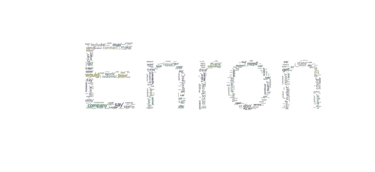

In [28]:
wc.logo_word_enron()

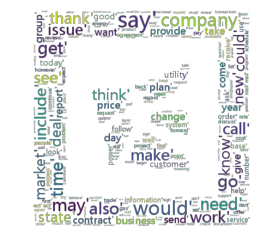

In [29]:
wc.logo_word_uni()